In [55]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=16)  # 这里假设SimSun字体路径，根据实际情况调整
# 加载数据
df = pd.read_csv("../Data/Q2_german_credit_data_with_scores.csv")

# 假设'Credit_Score'是包含信用得分的列名
scores = df['Credit_Score'].values

# 归一化得分到[0,1]区间
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(scores.reshape(-1, 1)).flatten()

# 定义目标函数：最小化组内方差
def objective(boundaries, scores):
    boundaries = np.sort(boundaries)
    boundaries = np.concatenate(([0], boundaries, [1]))
    groups = np.digitize(scores, boundaries[1:-1])
    return sum(np.var(scores[groups == i]) for i in range(len(boundaries)-1))

# 定义约束条件：边界值必须在[0,1]之间且递增
def constraint(boundaries):
    return np.diff(np.concatenate(([0], boundaries, [1])))

# 使用非线性规划求解最优边界
n_groups = 5
initial_boundaries = np.linspace(0, 1, n_groups+1)[1:-1]
result = minimize(objective, initial_boundaries, args=(normalized_scores,),
                  method='SLSQP', constraints={'type': 'ineq', 'fun': constraint})

# 获取最优边界
optimal_boundaries = np.sort(result.x)
optimal_boundaries = np.concatenate(([0], optimal_boundaries, [1]))

# 根据最优边界划分信用等级
credit_ratings = np.digitize(normalized_scores, optimal_boundaries[1:-1])

# 将信用等级映射到1-5（5表示最高信用）
credit_ratings = 5 - n_groups + credit_ratings 

# 将信用等级添加回DataFrame
df['Credit_Rating'] = credit_ratings

# 保存结果
df.to_csv('../Data/Q4_german_credit_data_with_ratings_nonlinear.csv', index=False)

# 打印结果
print(df[['Credit_Score', 'Credit_Rating']])

# 打印最优边界
print("\nOptimal boundaries:")
for i, boundary in enumerate(optimal_boundaries[1:-1], 1):
    print(f"Boundary {i}: {scaler.inverse_transform([[boundary]])[0][0]:.2f}")

     Credit_Score  Credit_Rating
0      792.573065              4
1      330.675005              0
2      824.836760              4
3      711.510050              3
4      357.837203              0
..            ...            ...
995    740.646111              4
996    690.750465              3
997    759.469430              4
998    318.572425              0
999    746.050155              4

[1000 rows x 2 columns]

Optimal boundaries:
Boundary 1: 410.29
Boundary 2: 517.46
Boundary 3: 624.63
Boundary 4: 731.79


In [56]:
# import matplotlib.pyplot as plt

# # 可视化聚类结果
# plt.figure(figsize=(10, 6))

# # 绘制信用评分和信用等级的散点图

# # 需要蔺经纬同志调配色！
# plt.scatter(df['Credit_Score'], df['Credit_Rating'], c=credit_ratings, cmap='viridis', marker='o')
# # 需要蔺经纬同志调配色！

# plt.colorbar(label='Credit Rating')
# plt.xlabel('Credit Score')
# plt.ylabel('Credit Rating')
# plt.title('Credit Score vs. Credit Rating')
# plt.grid(True)

# # 添加边界线
# for boundary in optimal_boundaries[1:-1]:

#     # 需要蔺经纬同志调配色！
#     plt.axvline(scaler.inverse_transform([[boundary]])[0][0], color='r', linestyle='--')
#     # 需要蔺经纬同志调配色！

# plt.savefig('../Data/Q4_Credit_Score_vs_Credit_Rating.png')
# plt.show()


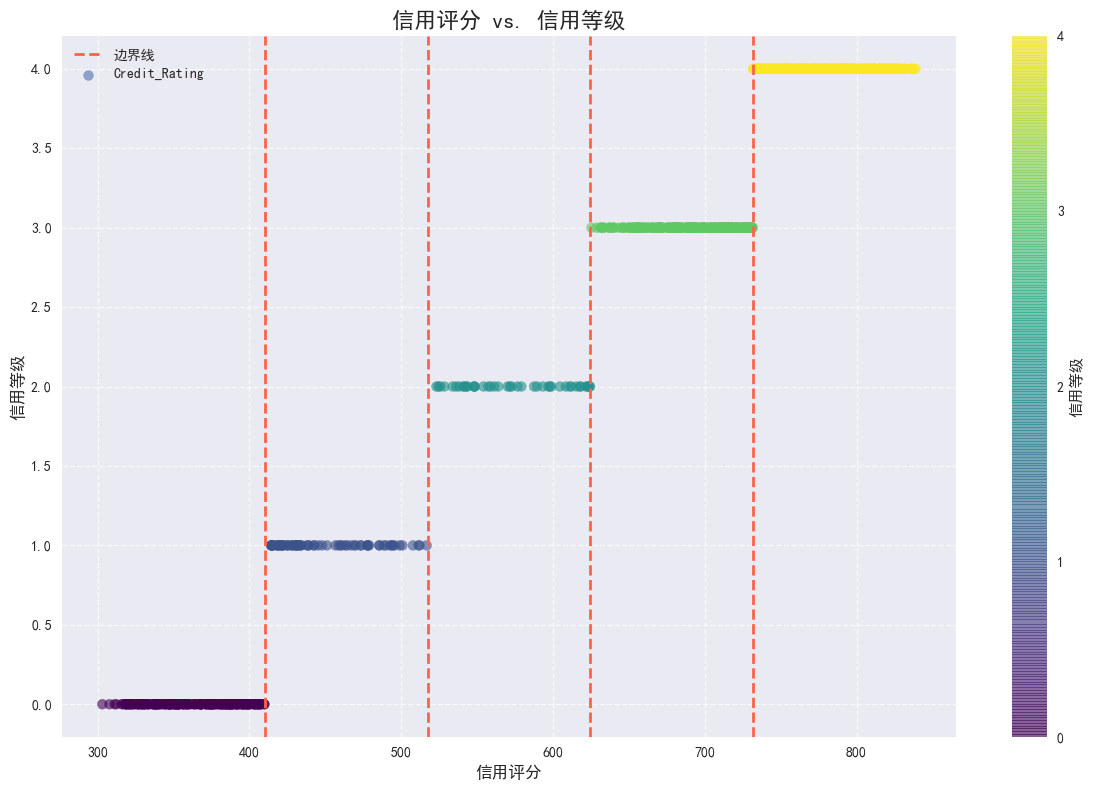

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格和字体
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 8))

# 创建颜色映射
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=df['Credit_Rating'].min(), vmax=df['Credit_Rating'].max())

# 绘制信用评分和信用等级的散点图
scatter = ax.scatter(df['Credit_Score'], df['Credit_Rating'], 
                     c=df['Credit_Rating'], cmap=cmap, norm=norm, 
                     marker='o', alpha=0.6, s=50)

# 添加颜色条
cbar = plt.colorbar(scatter, label='信用等级', ax=ax)
cbar.set_ticks(range(int(df['Credit_Rating'].min()), int(df['Credit_Rating'].max())+1))

# 设置轴标签和标题
ax.set_xlabel('信用评分', fontsize=12)
ax.set_ylabel('信用等级', fontsize=12)
ax.set_title('信用评分 vs. 信用等级', fontsize=16)

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7)

# 添加边界线
for boundary in optimal_boundaries[1:-1]:
    ax.axvline(scaler.inverse_transform([[boundary]])[0][0], 
               color='#FF6347', linestyle='--', linewidth=2, 
               label='边界线' if boundary == optimal_boundaries[1] else "")

# 添加图例
ax.legend(fontsize=10)

# 美化轴刻度
ax.tick_params(axis='both', which='major', labelsize=10)

# 调整布局并保存图片
plt.tight_layout()
plt.savefig('../Data/Q4_Credit_Score_vs_Credit_Rating.png', dpi=300, bbox_inches='tight')
plt.show()

In [58]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 计算每个信用等级的平均信用评分（聚类中心）
# cluster_centers = df.groupby('Credit_Rating')['Credit_Score'].mean()

# # 创建一个包含三个子图的图形
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# # 第一个子图：信用评分vs信用等级的散点图
# scatter = ax1.scatter(df['Credit_Score'], df['Credit_Rating'], c=credit_ratings, cmap='viridis', marker='o')
# ax1.set_xlabel('Credit Score')
# ax1.set_ylabel('Credit Rating')
# ax1.set_title('Credit Score vs. Credit Rating')
# ax1.grid(True)

# # 添加聚类中心
# for rating, center in cluster_centers.items():
#     ax1.scatter(center, rating, color='red', s=100, marker='x')
#     ax1.annotate(f'({center:.2f}, {rating})', (center, rating), xytext=(5, 5), 
#                  textcoords='offset points', color='red')

# # 添加边界线
# for boundary in optimal_boundaries[1:-1]:
#     ax1.axvline(scaler.inverse_transform([[boundary]])[0][0], color='r', linestyle='--')

# # 第二个子图：信用评级的箱型图
# sns.boxplot(x='Credit_Rating', y='Credit_Score', data=df, ax=ax2)
# ax2.set_xlabel('Credit Rating')
# ax2.set_ylabel('Credit Score')
# ax2.set_title('Distribution of Credit Scores by Rating')

# # 第三个子图：信用等级与违约率的关系条形图
# default_rates = df.groupby('Credit_Rating')['Y(1=default, 0=non-default)'].mean()
# ax3.bar(default_rates.index, default_rates.values)
# ax3.set_xlabel('Credit Rating')
# ax3.set_ylabel('Default Rate')
# ax3.set_title('Default Rate by Credit Rating')
# for i, v in enumerate(default_rates):
#     ax3.text(i, v, f'{v:.2%}', ha='center', va='bottom')

# plt.tight_layout()
# plt.savefig('../Data/Q4_Credit_Analysis.png')
# plt.show()

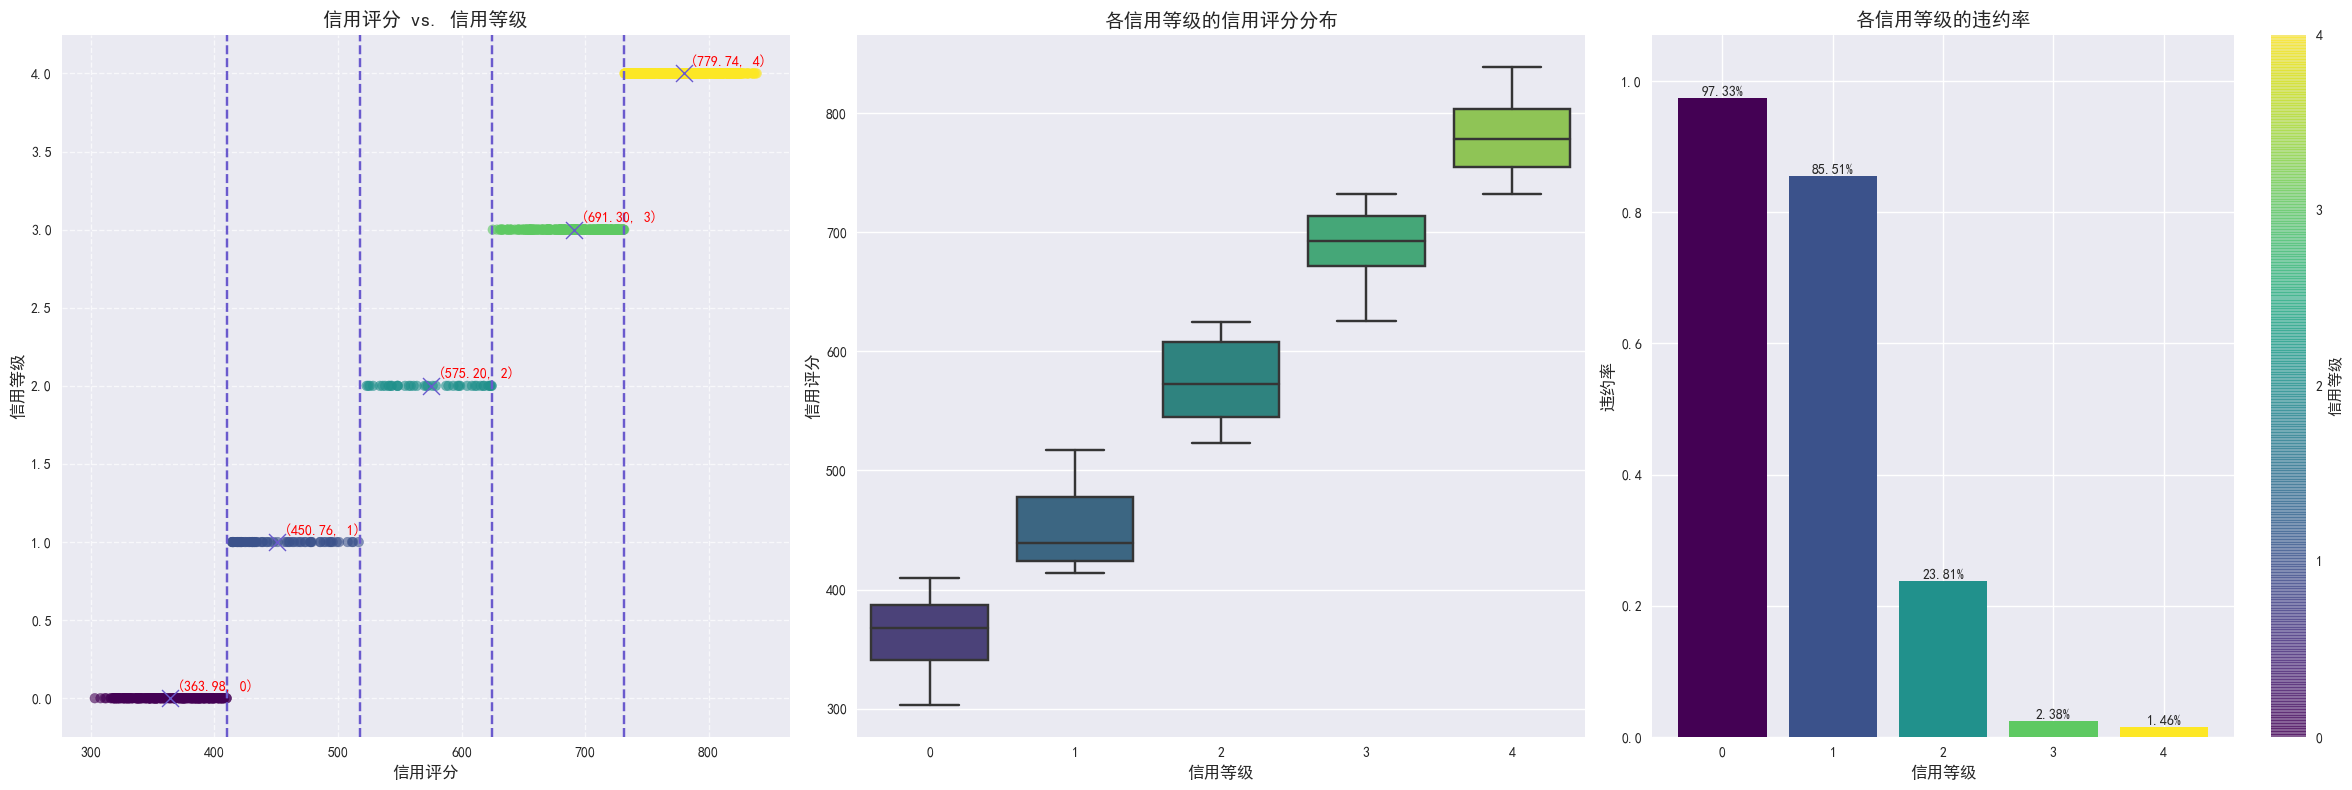

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# # 设置全局字体和样式
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# plt.style.use('seaborn')

# 计算每个信用等级的平均信用评分（聚类中心）
cluster_centers = df.groupby('Credit_Rating')['Credit_Score'].mean()

# 创建一个包含三个子图的图形
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# 颜色映射
cmap = plt.cm.viridis
norm = plt.Normalize(df['Credit_Rating'].min(), df['Credit_Rating'].max())

# 第一个子图：信用评分vs信用等级的散点图
scatter = ax1.scatter(df['Credit_Score'], df['Credit_Rating'], c=df['Credit_Rating'], cmap=cmap, norm=norm, alpha=0.6)
ax1.set_xlabel('信用评分', fontsize=12)
ax1.set_ylabel('信用等级', fontsize=12)
ax1.set_title('信用评分 vs. 信用等级', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# 添加聚类中心
for rating, center in cluster_centers.items():
    ax1.scatter(center, rating, color='#6A5ACD', s=150, marker='x', edgecolor='black', linewidth=1)
    ax1.annotate(f'({center:.2f}, {rating})', (center, rating), xytext=(5, 5), 
                 textcoords='offset points', color='red', fontweight='bold')

# 添加边界线
for boundary in optimal_boundaries[1:-1]:
    ax1.axvline(scaler.inverse_transform([[boundary]])[0][0], color='#6A5ACD', linestyle='--')

# 第二个子图：信用评级的箱型图
sns.boxplot(x='Credit_Rating', y='Credit_Score', data=df, ax=ax2, palette='viridis')
ax2.set_xlabel('信用等级', fontsize=12)
ax2.set_ylabel('信用评分', fontsize=12)
ax2.set_title('各信用等级的信用评分分布', fontsize=14)

# 第三个子图：信用等级与违约率的关系条形图
default_rates = df.groupby('Credit_Rating')['Y(1=default, 0=non-default)'].mean()
bars = ax3.bar(default_rates.index, default_rates.values, color=cmap(norm(default_rates.index)))
ax3.set_xlabel('信用等级', fontsize=12)
ax3.set_ylabel('违约率', fontsize=12)
ax3.set_title('各信用等级的违约率', fontsize=14)
ax3.set_ylim(0, max(default_rates.values) * 1.1)  # 设置y轴上限，留出空间显示百分比

for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}',
             ha='center', va='bottom', fontweight='bold')

# 添加颜色条
cbar = fig.colorbar(scatter, ax=ax3, orientation='vertical', label='信用等级')
cbar.set_ticks(np.arange(df['Credit_Rating'].min(), df['Credit_Rating'].max()+1))

plt.tight_layout()
plt.savefig('../Data/Q4_Credit_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [60]:
# 打印出信用等级与违约率的关系
print(default_rates)

Credit_Rating
0    0.973333
1    0.855072
2    0.238095
3    0.023810
4    0.014563
Name: Y(1=default, 0=non-default), dtype: float64
